# Pyber Ride Sharing

Market Differentiation Analysis

The bubble chart indicates that there are more drivers and riders in urban areas and the average fare price is higher in rural and suburban areas.

Sixty seven percent of the total revenue is derived from the urban areas which means that there are more people living in urban areas using public transportation and shorter routes. 

The suburban area makes up 30 percent of the sales and riders. The average fare is much higher than urban fare sales. 

There can be a correlation between the demand for pyber services within urban areas. 

In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

In [3]:
# Display the city data table for preview
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [13]:
# Display the rideer data table for preview
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [14]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, on="city")

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [15]:
# group by city and type   
group_city = pyber_df.groupby(["city","type"])

# calculate average fare per city, total number of rides per city 
# total sales per city and total number of drivers per city
tot_fare_sales = group_city["fare"].sum()
avg_fare_sales = group_city["fare"].mean()
tot_rides = group_city["ride_id"].count()
tot_drivers = group_city["driver_count"].sum()

In [16]:
# build a new dataframe with calculated data 
group_city_df = group_city["ride_id"].count().to_frame()
group_city_df.drop('ride_id', axis=1, inplace=True)
group_city_df["Chart_Colors"] = "" 
group_city_df["Total_Fare_Sales"] = tot_fare_sales
group_city_df["Avg_Fare"] = avg_fare_sales
group_city_df["Total_Rides"] = tot_rides
group_city_df["Total_Drivers"] = tot_drivers
# drop the index 
group_city_df.reset_index(drop=False, inplace=True)
group_city_df.head()

,city,type,Chart_Colors,Total_Fare_Sales,Avg_Fare,Total_Rides,Total_Drivers
0,Amandaburgh,Urban,,443.55,24.641667,18,216
1,Barajasview,Urban,,557.31,25.332273,22,572
2,Barronchester,Suburban,,582.76,36.422500,16,176
3,Bethanyland,Suburban,,593.21,32.956111,18,396
4,Bradshawfurt,Rural,,400.64,40.064000,10,70


In [17]:
# set the color based on the city type
for idx, row in group_city_df.iterrows() :
    if row['type'] == "Urban":
        group_city_df.loc[idx,"Chart_Colors"] = "coral"
    elif row['type'] == "Suburban":
        group_city_df.loc[idx,"Chart_Colors"] = "lightskyblue"
    elif row['type'] == "Rural":
        group_city_df.loc[idx,"Chart_Colors"] = "gold"
        
group_city_df.head()

,city,type,Chart_Colors,Total_Fare_Sales,Avg_Fare,Total_Rides,Total_Drivers
0,Amandaburgh,Urban,coral,443.55,24.641667,18,216
1,Barajasview,Urban,coral,557.31,25.332273,22,572
2,Barronchester,Suburban,lightskyblue,582.76,36.422500,16,176
3,Bethanyland,Suburban,lightskyblue,593.21,32.956111,18,396
4,Bradshawfurt,Rural,gold,400.64,40.064000,10,70


In [18]:
# createa a dataframe for each city type
urban_df = group_city_df.loc[group_city_df['type']== 'Urban']
suburban_df = group_city_df.loc[group_city_df['type']== 'Suburban']
rural_df = group_city_df.loc[group_city_df['type']== 'Rural']

In [19]:
# createa the x and y axis for each city type        
x_axis_urban = urban_df["Total_Rides"]
y_axis_urban = urban_df["Avg_Fare"]
x_axis_suburban = suburban_df["Total_Rides"]
y_axis_suburban = suburban_df["Avg_Fare"]
x_axis_rural = rural_df["Total_Rides"]
y_axis_rural = rural_df["Avg_Fare"]

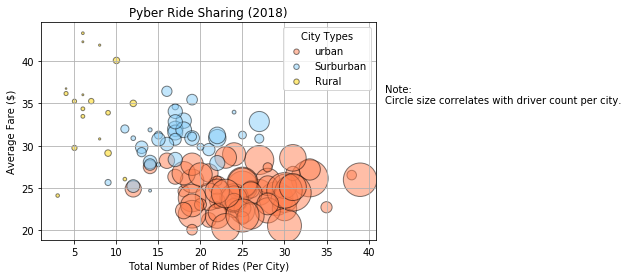

In [34]:
# Build the scatter plots for each city types
urban_plt = plt.scatter(x_axis_urban, y_axis_urban
            ,s=urban_df["Total_Drivers"] * .6
            ,alpha=0.5,edgecolors="black"
            ,c=urban_df["Chart_Colors"]
            ,label=urban_df["type"])

suburban_plt = plt.scatter(x_axis_suburban, y_axis_suburban
            ,s=suburban_df["Total_Drivers"] * .6
            ,alpha=0.5,edgecolors="black"
            ,c=suburban_df["Chart_Colors"]
            ,label=suburban_df["type"])

rural_plt = plt.scatter(x_axis_rural, y_axis_rural
            ,s=rural_df["Total_Drivers"] * .6
            ,alpha=0.5,edgecolors="black"
            ,c=rural_df["Chart_Colors"]
            ,label=rural_df["type"])
# Incorporate the other graph properties
plt.grid(True)

# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend


leg = plt.legend(["urban", "Surburban", "Rural"],frameon = True, title = "City Types")
leg.legendHandles[0]._sizes = [30]
leg.legendHandles[1]._sizes = [30]
leg.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35, "Note: " + "\n" + "Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("PyberBubbleplot.png")

plt.show()

## Total Fares by City Type

In [21]:
# Calculate total fare sales by city tppe and convet to percent  
urban_total_fare_sales = urban_df["Total_Fare_Sales"].sum()
suburban_total_fare_sales = suburban_df["Total_Fare_Sales"].sum()
rural_total_fare_sales= rural_df["Total_Fare_Sales"].sum()
pyber_total_fare_sales = pyber_df["fare"].sum()
urban_percent_total_fare_sales =  urban_total_fare_sales /pyber_total_fare_sales * 100
suburban_percent_total_fare_sales =  suburban_total_fare_sales /pyber_total_fare_sales * 100
rural_percent_total_fare_sales =  rural_total_fare_sales /pyber_total_fare_sales * 100

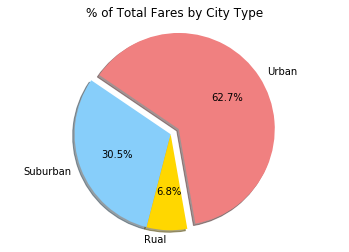

In [22]:
# Labels for the sections of the pie chart
pie_section_lable  = ["Urban", "Suburban", "Rual"]

# The values of each section of the pie chart
pie_section_percent = [urban_percent_total_fare_sales, suburban_percent_total_fare_sales, rural_percent_total_fare_sales]

# The colors of each section of the pie chart
pie_section_color = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
pie_section_explode = (0.1, 0, 0)

# create the pie chart
explode = ()
plt.pie(pie_section_percent, explode=pie_section_explode,
        labels=pie_section_lable, colors=pie_section_color,
        autopct="%1.1f%%", shadow=True,startangle=280)

#Create axes which are equal so we have a perfect circle
plt.title('% of Total Fares by City Type')
plt.axis("equal")
plt.axis('off')

# Save an image of thechart and print the final product to the screen
plt.savefig("PyberPieTotByCityType.png")
plt.show()





## Total Rides by City Type

In [24]:
# Calculate total rides by city tppe and convet to percent  
urban_total_rides = urban_df["Total_Rides"].sum()
suburban_total_rides = suburban_df["Total_Rides"].sum()
rural_total_rides = rural_df["Total_Rides"].sum()
pyber_total_rides = pyber_df["ride_id"].count()
urban_percent_total_rides =  urban_total_rides /pyber_total_rides * 100
suburban_percent_total_rides =  suburban_total_rides /pyber_total_rides * 100
rural_percent_total_rides =  rural_total_rides /pyber_total_rides * 100

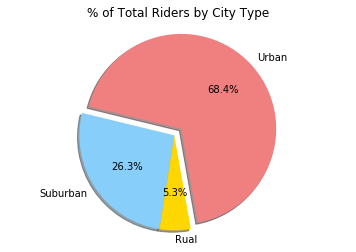

In [25]:
# Labels for the sections of the pie chart
pie_section_lable  = ["Urban", "Suburban", "Rual"]

# The values of each section of the pie chart
pie_section_percent = [urban_percent_total_rides, suburban_percent_total_rides, rural_percent_total_rides]

# The colors of each section of the pie chart
pie_section_color = ["lightcoral", "lightskyblue", "gold"]

# seperate the "Python" section from the others
pie_section_explode = (0.1, 0, 0)

# create the pie chart
explode = ()
plt.pie(pie_section_percent, explode=pie_section_explode,
        labels=pie_section_lable, colors=pie_section_color,
        autopct="%1.1f%%", shadow=True,startangle=280)
        

#Create axes which are equal so we have a perfect circle
plt.title('% of Total Riders by City Type')
plt.axis("equal")

# Save an image of thechart and print the final product to the screen
plt.savefig("PyberPieTotRidesByCityType.png")
plt.show()

## Total Drivers by City Type

In [26]:
# Calculate total rides by city tppe and convet to percent  
urban_total_drivers = urban_df["Total_Drivers"].sum()
suburban_total_drivers = suburban_df["Total_Drivers"].sum()
rural_total_drivers = rural_df["Total_Drivers"].sum()
pyber_total_drivers = pyber_df["driver_count"].sum()
urban_percent_total_drivers =  urban_total_drivers /pyber_total_drivers * 100
suburban_percent_total_drivers =  suburban_total_drivers /pyber_total_drivers * 100
rural_percent_total_drivers =  rural_total_drivers /pyber_total_drivers * 100

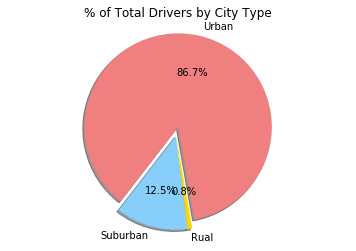

In [35]:
# Labels for the sections of the pie chart
pie_section_lable  = ["Urban", "Suburban", "Rual"]

# The values of each section of the pie chart
pie_section_percent = [urban_percent_total_drivers, suburban_percent_total_drivers, rural_percent_total_drivers]

# The colors of each section of the pie chart
pie_section_color = ["lightcoral", "lightskyblue", "gold"]

# seperate the "Python" section from the others
pie_section_explode = (0.1, 0, 0)

# create the pie chart
explode = ()
plt.pie(pie_section_percent, explode=pie_section_explode,
        labels=pie_section_lable, colors=pie_section_color,
        autopct="%1.1f%%", shadow=True,startangle=280)
       

#Create axes which are equal so we have a perfect circle
plt.title('% of Total Drivers by City Type')
plt.axis("equal")

# Save an image of thechart and print the final product to the screen
plt.savefig("PyberPieTotDriverByCityType.png")
plt.show()